## Imports

In [1]:
# 09/11/2021
# Setup
## libs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

## params
%matplotlib inline
np.random.seed(0)
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
sns.set_theme(context="notebook")

## data
test = pd.read_csv('../test.csv', index_col='Id')
dT = pd.read_csv('../train.csv', index_col='Id')
dT

,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
Id,,,,,,,,,,,,,
0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,0,0,1,15
ffcc8532d76436fc79e50eb2e5238e45,0,1,1,1,0,0,0,0,0,0,0,0,70
ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,1,0,0,20


## EDA

In [22]:
a = tf.keras.utils.load_img('../train/0a0da090aa9f0342444a7df4dc250c66.jpg')
print(a)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=393x470 at 0x25558ED1D00>


In [25]:
import tensorflow_datasets as tfds
builder = tfds.ImageFolder('C:/Users/alexa/Desktop/sync/NIAS_online/NIASIA/comps/pawpular/train/')
print(builder.info)  # num examples, labels... are automatically calculated
ds = builder.as_dataset()
# split='train', shuffle_files=True)
# tfds.show_examples(ds, builder.info)
ds

tfds.core.DatasetInfo(
    name='image_folder',
    full_name='image_folder/1.0.0',
    description="""
    Generic image classification dataset.
    """,
    homepage='https://www.tensorflow.org/datasets/catalog/image_folder',
    data_path='C:/Users/alexa/Desktop/sync/NIAS_online/NIASIA/comps/pawpular/train/',
    download_size=Unknown size,
    dataset_size=Unknown size,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=0),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
    },
    citation="""""",
)


ValueError: Unrecognized split <tensorflow_datasets.core.folder_dataset.image_folder.ImageFolder object at 0x0000025558EE55E0>. Subsplit API not yet supported for ImageFolder. Split name should be one of [].

In [10]:
ls -la  *

 Volume in drive C has no label.
 Volume Serial Number is 54DB-9029

 Directory of c:\Users\alexa\Desktop\sync\NIAS_online\NIASIA\comps\pawpular\src


 Directory of c:\Users\alexa\Desktop\sync\NIAS_online\NIASIA\comps\pawpular\src

11/22/2021  05:24 PM    <DIR>          .
11/22/2021  05:24 PM    <DIR>          ..
10/14/2021  12:25 PM           940,964 firstsub.ipynb
10/13/2021  01:38 PM    <DIR>          train
11/09/2021  12:46 PM         1,507,972 transfLearning0.ipynb
11/22/2021  05:21 PM           191,126 transfLearning1.ipynb
10/14/2021  12:25 PM               364 xgboost_simpleEDA_firstSub_submisssion.csv
               4 File(s)      2,640,426 bytes
               3 Dir(s)  178,137,272,320 bytes free


In [11]:
# tf.keras.utils.image_dataset_from_directory()
val_ds = tf.keras.utils.image_dataset_from_directory(directory=
  './train',
  validation_split=0.2,
  subset="validation",
  seed=123,
)

Found 0 files belonging to 0 classes.
Using 0 files for validation.


ValueError: No images found.

,x,y
count,9912.000000,9912.000000
mean,904.284302,804.426251
std,156.905980,270.211921
min,113.000000,90.000000
25%,908.750000,675.000000
50%,960.000000,720.000000
75%,960.000000,960.000000
max,1280.000000,1280.000000


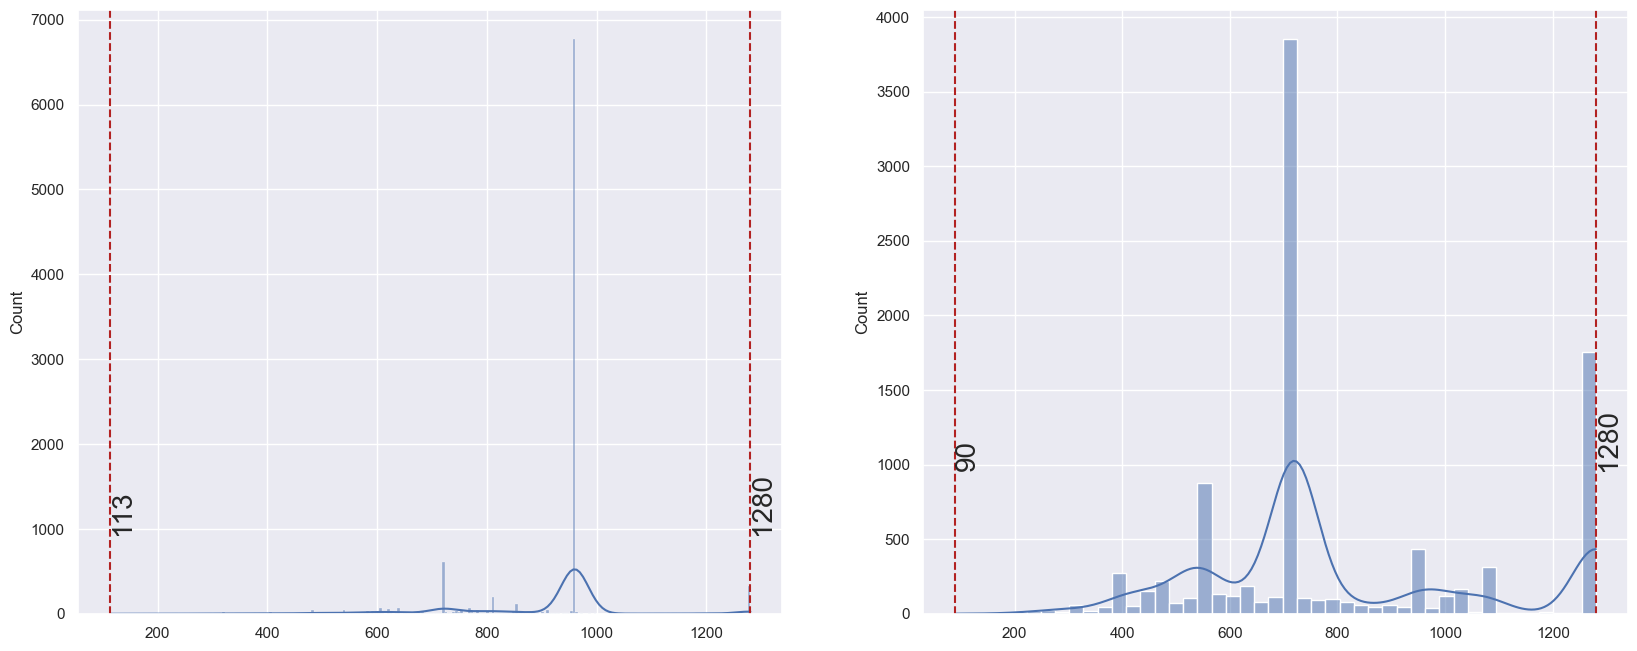

In [2]:
sizes = []
caminhos = []
for ii in range(0, len(dT)):
    caminho = '../train/'+dT.index[ii]+'.jpg'
    uma = plt.imread(caminho)
    caminhos.append(caminho)
    sizes.append(uma.shape)

x = [i[0] for i in sizes]
y = [j[1] for j in sizes]

sizesDF = pd.DataFrame({'x': x, 'y':y})

ax = plt.subplot(121);
sns.histplot(data = x, ax = ax, kde = True);
plt.axvline(x = min(x), color = 'firebrick', linestyle = '--');
plt.axvline(x = max(x), color = 'firebrick', linestyle = '--');
plt.text(x = min(x),y = 1000,s=str(min(x)),rotation=90, fontsize = 20);
plt.text(x = max(x),y = 1000,s=str(max(x)),rotation=90, fontsize = 20);

ax2= plt.subplot(122);
sns.histplot(data = y, ax = ax2, kde = True);
plt.axvline(x = min(y), color = 'firebrick', linestyle = '--');
plt.axvline(x = max(y), color = 'firebrick', linestyle = '--');
plt.text(x = min(y),y = 1000,s=str(min(y)),rotation=90, fontsize = 20);
plt.text(x = max(y),y = 1000,s=str(max(y)),rotation=90, fontsize = 20);

sizesDF.describe()

## Prep model 

In [3]:
# https://keras.io/examples/vision/image_classification_efficientnet_fine_tuning/
from tensorflow.keras.applications import EfficientNetB0
import tensorflow as tf

# model = EfficientNetB0(weights='imagenet')
# model = EfficientNetB0(include_top=False, weights='imagenet')
# model.summary()

IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)
batch_size = 64

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

img_augmentation = Sequential(
    [
        layers.RandomRotation(factor=0.15),
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        layers.RandomFlip(),
        layers.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)

def build_model(NUM_CLASSES):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = img_augmentation(inputs)
    model = EfficientNetB0(include_top=False, input_tensor=x, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="pred")(x)

    # Compile
    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
    model.compile(
        optimizer=optimizer, loss="rmse", metrics=["rmse"]
    )
    return model

model = build_model(1)
model.summary()

# with strategy.scope():
#     inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
#     x = img_augmentation(inputs)
#     outputs = EfficientNetB0(include_top=False, weights='imagenet')(x)
#     outputs.trainable = False
#     decision = MinhaParte()(outputs)
#     model = tf.keras.Model(inputs, outputs, decision)
#     model.compile(
#         optimizer="adam", loss="rmse", metrics=["rmse"]
#     )

# model.summary()

# epochs = 40  # @param {type: "slider", min:10, max:100}
# hist = model.fit(ds_train, epochs=epochs, validation_data=ds_test, verbose=2)


Model: "EfficientNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
img_augmentation (Sequential)   (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           img_augmentation[0][0]           
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
_______________________________________________________________________________________

## Data setup

In [5]:
from sklearn.model_selection import train_test_split

X = dT.copy()
y = X.pop('Pawpularity')

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

X_train

,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur
Id,,,,,,,,,,,,
1f7f000086edf5e4c0f5a8e4d93f157d,0,0,1,1,0,0,0,0,0,0,1,1
7dd949718a6e4b136ac2322bf35f3c4d,1,1,1,1,0,0,0,0,0,0,0,0
41f2c7ce82dd783c69fea060fc9ff51b,0,1,1,1,0,0,0,0,1,0,0,0
1305cfa87233ca768c0d7decf0c3115d,0,1,1,1,0,0,0,0,0,0,0,0
0ba16cbf3e523fa8fa89bea38b49af17,0,1,1,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
94773ee6f04891c99bc4d37e8f20ff6f,0,1,1,1,0,0,0,0,1,1,0,0
85e7146eeb13644b1bac74b684ccf51f,0,1,1,1,0,0,0,0,0,0,0,0
8afb263d779be24c94f01046e5ec3e81,0,1,1,1,0,0,0,0,0,0,0,0


In [41]:
print(caminhos[0])
tf.image.decode_image(caminhos[0], channels=3)

../train/0007de18844b0dbbb5e1f607da0606e0.jpg


InvalidArgumentError: Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeImage]

In [22]:
# step 1
# filenames = tf.constant(['im_01.jpg', 'im_02.jpg', 'im_03.jpg', 'im_04.jpg'])
filenames = caminhos
# labels = tf.constant([0, 1, 0, 1])
labels = y.values

# step 2: create a dataset returning slices of `filenames`
dataset = tf.data.Dataset.from_tensor_slices((filenames, labels))

# step 3: parse every image in the dataset using `map`
def _parse_function(filename, label):
    # image_string = tf.read_file(filename)
    image_decoded = tf.image.decode_jpeg(filename, channels=3)
    image = tf.cast(image_decoded, tf.float32)
    return image, label

dataset = dataset.map(_parse_function(filenames,labels))
dataset = dataset.batch(2)

# step 4: create iterator and final input tensor
# iterator = dataset.make_one_shot_iterator()
# images, labels = iterator.get_next()
dataset

InvalidArgumentError: `contents` must be scalar but got shape[9912] [Op:DecodeJpeg]

## Train

In [6]:
epochs = 25  # @param {type: "slider", min:8, max:80}
hist = model.fit(x= X_train, y= y_train, epochs=epochs, validation_data=(X_val, y_val), verbose=2)
plot_hist(hist)

NameError: name 'ds_train' is not defined